# SPECFEM Users Workshop (Oct. 5-7, 2022)
-------------------------

## Day 0: Container Testing Instructions

- Day 0 instructions are meant for Users to test out their Docker container to ensure that things will go smoothly during the workshop.  
- Estimated times are provided next to each task to provide a benchmark on how fast thing should run. 
- Benchmarks run on a 2015 Macbook Pro (OSX 10.14.6) with 3.1GHz Intel Core i7, and 16Gb of ram. 
- If you run into any issues, please copy the error message, make note of the cell, and open a GitHub issue (https://github.com/adjtomo/adjdocs/issues).
- These instructions should be run from inside a Docker container, using Jupyter Lab (see instructions [here](https://github.com/adjtomo/adjdocs/blob/main/readmes/docker_image_install.md)).  
----------------

**Docker Preamble:**  

To open this container you will need the latest Docker Image:  
**> Please run the following from your computer's Terminal**

```bash
docker pull ghcr.io/seisscoped/adjtomo:ubuntu20.04
```

To save the results we obtain from inside our container, we will need to mount our local filesystem.  
**> Please `cd` (change directory) to am empty working directory before running the following command:**

```bash
docker run -p 8888:8888 --mount type=bind,source=$(pwd),target=/home/scoped/work --shm-size=1gb ghcr.io/seisscoped/adjtomo:ubuntu20.04 
```

>__Docker commands explanation__: `pull` downloads the Docker Image from GitHub. `run` launches the container. `--mount`  binds our local filesystem (in the current working directory, pwd) with the container's internal filesytem (at location /home/scoped/work). `--shm-size` tells Docker to give us 1 Gigabyte of shared memory, which is required for MPI processes.

>__M1 Macs__: Our Docker container is not well optimized for Macs running M1 chips, as compared to those running Intel chips. This results in Docker running >10x slower on M1 Macs. If you have an M1 we suggest you find an alternative for the workshop (Intel Mac, Windows, Linux) but if that is not possible, you can optimize your container slightly by adding the flag `--platform linux/amd64` to the 'docker run' command above (e.g., `docker run -p 8888:8888 --platform linux/amd64 ...`). With that said, please be prepared for overall slower run times, we will try to accomodate this as much as possible. 

>__M1 Mac manual install__: For those adamant about using their M1 Mac, you may follow along these instructions to manually install software required. Use at your own risk! 
https://github.com/adjtomo/adjdocs/blob/main/readmes/manual_install_instructions.md

>__SIGBUS Error__: If you are receiving the error message *Program received signal SIGBUS: Access to an undefined portion of a memory object.*, please `File -> Shut Down` the current container and reopen with a larger value for the `--shm-size` flag above. e.g., `--shm-size=2gb`. 

--------------------

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)


**Relevant Links:** 
- Today's notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_0_container_testing.ipynb
- Today's completed notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_0_container_testing.ipynb
- Workshop announcement: https://sites.google.com/alaska.edu/carltape/home/research/specfem2022?authuser=0
- adjTomo Container: https://github.com/SeisSCOPED/adjtomo
- adjTomo Org Page: https://github.com/adjTomo
- SeisFlows docs: https://seisflows.readthedocs.io/en/devel/
- Pyatoa docs: https://pyatoa.readthedocs.io/en/devel/
- PySEP readme: https://github.com/uafgeotools/pysep#readme

--------------

In [1]:
# Python import for in-notebook visualizations
from IPython.display import Image

## 1) Testing SPECFEM2D

We want to make sure we can run SPECFEM2D natively by running the example problem using MPI.  
**Benchmark time for cell w/ 4 MPI processes: ~60s**

In [2]:
%cd /home/scoped/specfem2d

# Convenience function to edit the SPECFEM Par_file from the command line
! seisflows sempar -P DATA/Par_file nproc 4  # change number of processors from 1 to 4

! mpirun -n 4 bin/xmeshfem2D
! mpirun -n 4 bin/xspecfem2D

/home/scoped/specfem2d
NPROC: 1 -> 4

 **********************************************
 *** Specfem 2-D Mesher - MPI version       ***
 **********************************************

 Running Git version of the code corresponding to commit 133d3524c25ec8f42e2afe89e676d8c871bd3d2e
 dating From Date:   Fri Sep 16 12:26:48 2022 +0200

 Reading the parameter file...

 Title of the simulation: Test of SPECFEM2D with curved interfaces


 Receiver lines:
   Nb of line sets =            2

 Materials:
   Nb of solid, fluid or porous materials =            4

 --------
 Material #           1  isotropic
 rho,cp,cs   =    2700.0000000000000        3000.0000000000000        1732.0509999999999     
 Qkappa, Qmu =    9999.0000000000000        9999.0000000000000     
 Material is solid
 --------
 Material #           2  isotropic
 rho,cp,cs   =    2500.0000000000000        2700.0000000000000        0.0000000000000000     
 Qkappa, Qmu =    9999.0000000000000        9999.0000000000000     
 Material 

Using the navigation menu on the left, navigate to:

`home -> specfem2d -> OUTPUT_FILES`

**Open** any of the `forward_image*.jpg` files and see that the wavefront makes sense. It should look like a layered halfspace with topography and 3 layers.
One such figure is shown below.

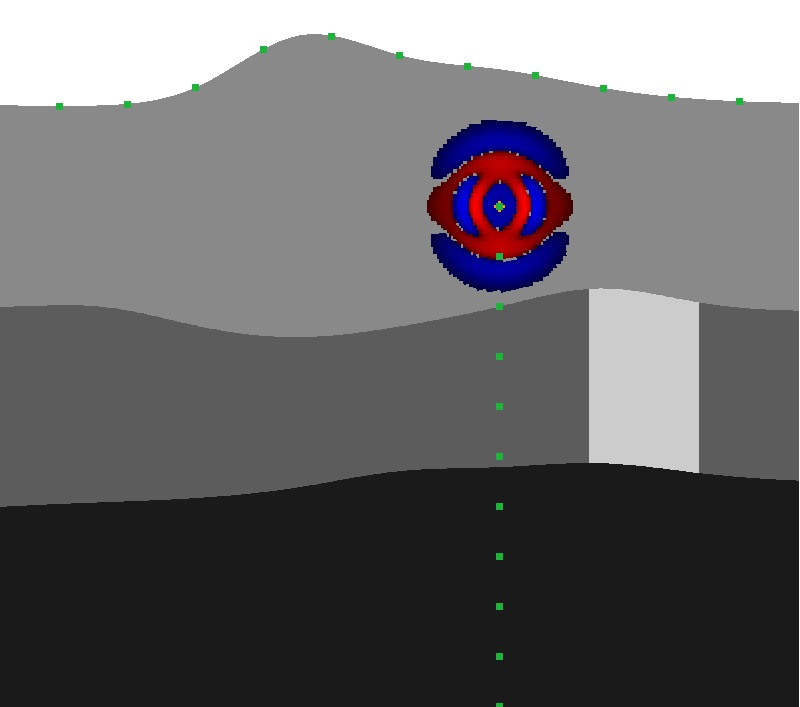

In [3]:
Image("OUTPUT_FILES/forward_image000000200.jpg")

### Testing Record Section (RecSec) Tool with SPECMFE2D Synthetics
- Make sure we can plot record sections (using PySEP) from SPECFEM2D synthetic waveforms.
- Must point RecSec at 1) synthetics, 2) station metadata, 3) source metadata
- The `--cartesian` flag tells RecSec that the SPECFEM2D domain is cartesian (not geographic)

In [4]:
# Try RecSec with SPECFEM2D synthetics
! recsec --syn_path OUTPUT_FILES/ --cmtsolution DATA/SOURCE --stations DATA/STATIONS --cartesian

[2022-10-03 05:59:57] - pysep - INFO: starting record section plotter
[2022-10-03 05:59:57] - pysep - INFO: Reading 44 synthetics from: OUTPUT_FILES/
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0001.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0001.BXZ.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0002.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0002.BXZ.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0003.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0003.BXZ.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0004.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0004.BXZ.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0005.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0005.BXZ.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0006.BXX.semd
[2022-10-03 05:59:57] - pysep - DEBUG: OUTPUT_FILES/AA.S0006.BXZ.semd
[2022-10-0

Using the navigation menu on the left, navigate to:

`home -> work -> specfem2d`

**Open** the `record_section.png` file to look at the created record section.


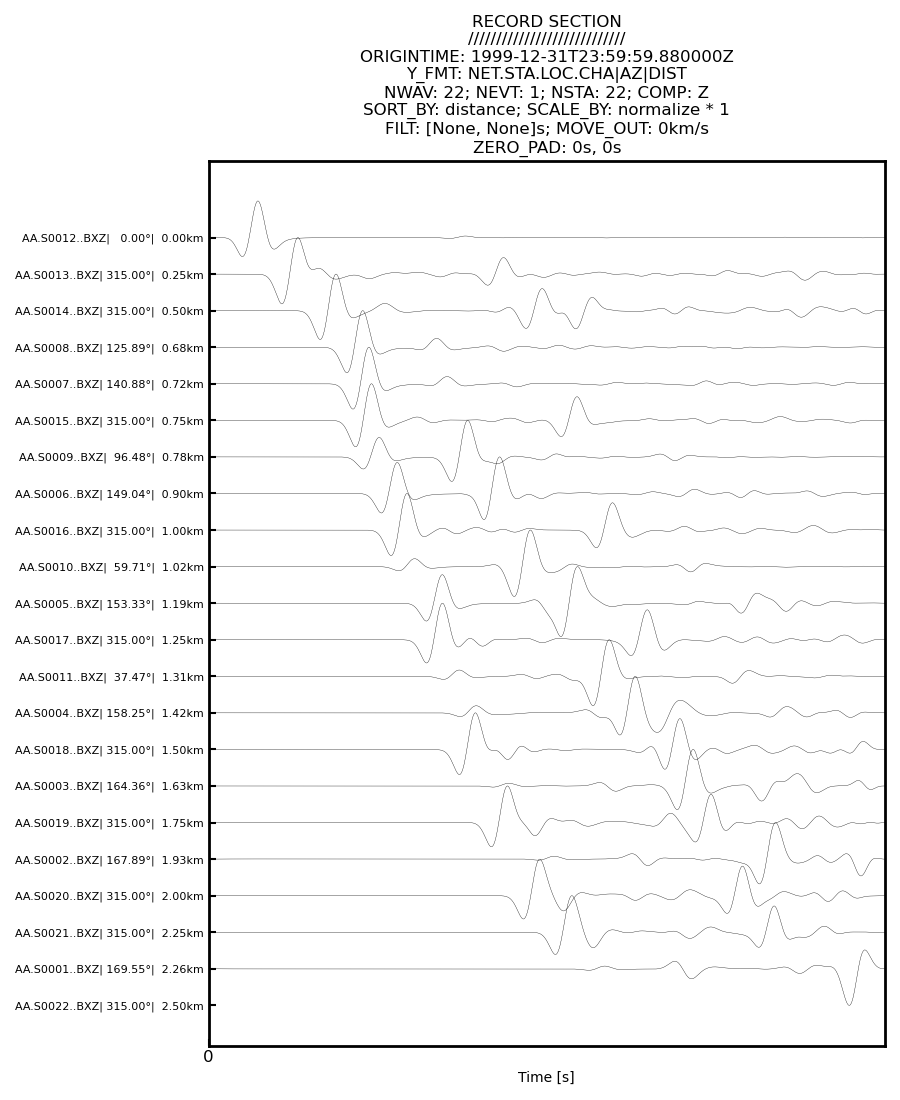

In [5]:
Image("record_section.png")

## 2) SeisFlows Setup

Some directory bookkeeping to make sure we keep the container's `/home` directory free of clutter

In [6]:
%cd /home/scoped/work  

! mkdir example_1 example_2 example_2a example_3 

/home/scoped/work


>__NOTE:__ Successfully run examples will end with the following log message 

```
================================================================================
EXAMPLE COMPLETED SUCCESFULLY
================================================================================
```

## 3) Example 1: Homogeneous Halfspace Inversion

- This example runs a 1 iteration inversion for a single source-receiver pair, using two homogeneous halfspace models.  
- See [SeisFlows Example \#1 docs page](https://seisflows.readthedocs.io/en/devel/specfem2d_example.html#example-1-homogenous-halfspace-inversion) for guidance on what is going on  
- **Benchmark time for cell w/ 2 MPI processes: ~1m45s**

In [7]:
# Run Example 1 with 2 processors
%cd /home/scoped/work/example_1
! seisflows examples run 1 -r /home/scoped/specfem2d --with_mpi --nproc 2

/home/scoped/work/example_1

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                                @@@@@@@@@@@@@@

In [8]:
# Plots the initial and final models, as well as the gradient 
! seisflows plot2d MODEL_INIT vs --savefig m_init_vs.png
! seisflows plot2d MODEL_TRUE vs --savefig m_true_vs.png
! seisflows plot2d GRADIENT_01 vs_kernel --savefig g_01_vs.png
! seisflows plot2d MODEL_01 vs --savefig m_01_vs.png

Figure(707.107x707.107)
Figure(707.107x707.107)
Figure(707.107x707.107)
Figure(707.107x707.107)


Using the navigation menu on the left, navigate to:

`home -> work -> example_1`

and **open** each of the .png files that were created to look at the results of this simple inversion. They should match the figures shown in the documentation page.

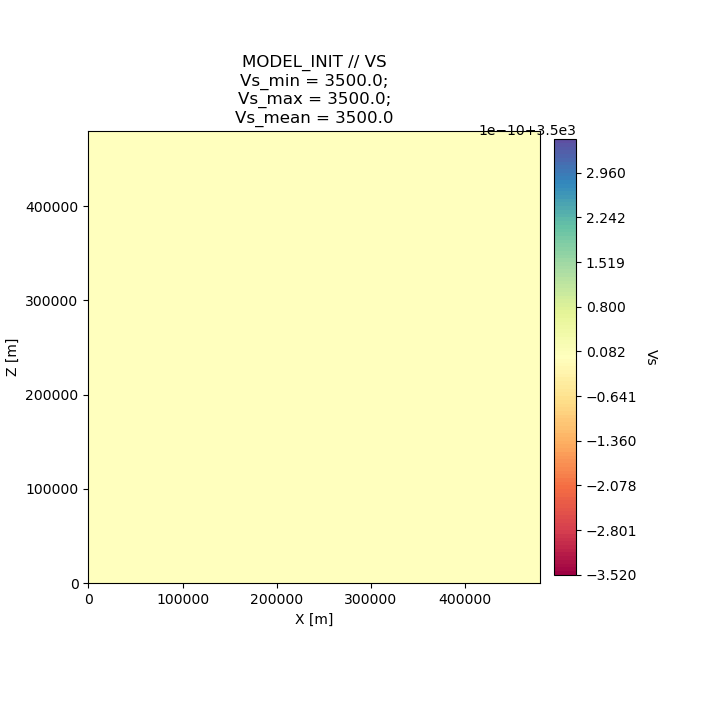

In [9]:
Image("m_init_vs.png")

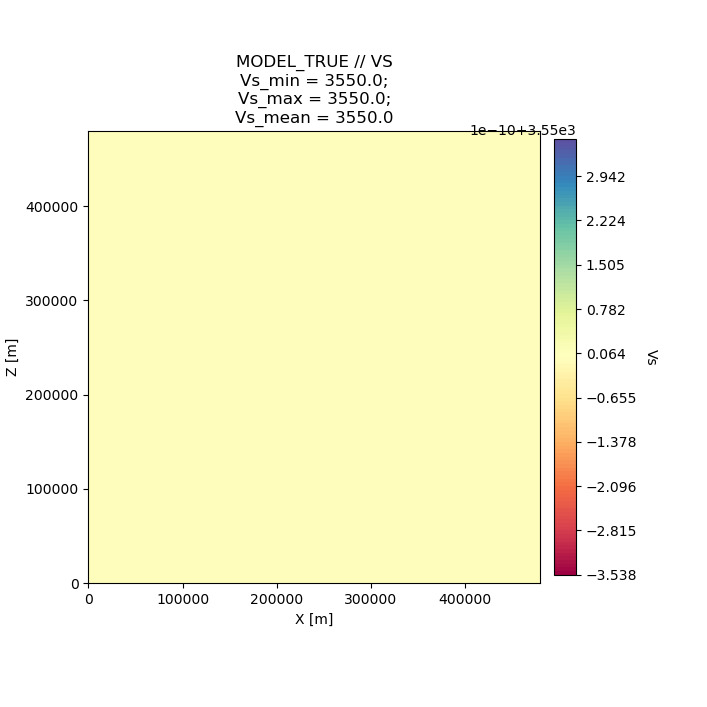

In [10]:
Image("m_true_vs.png")

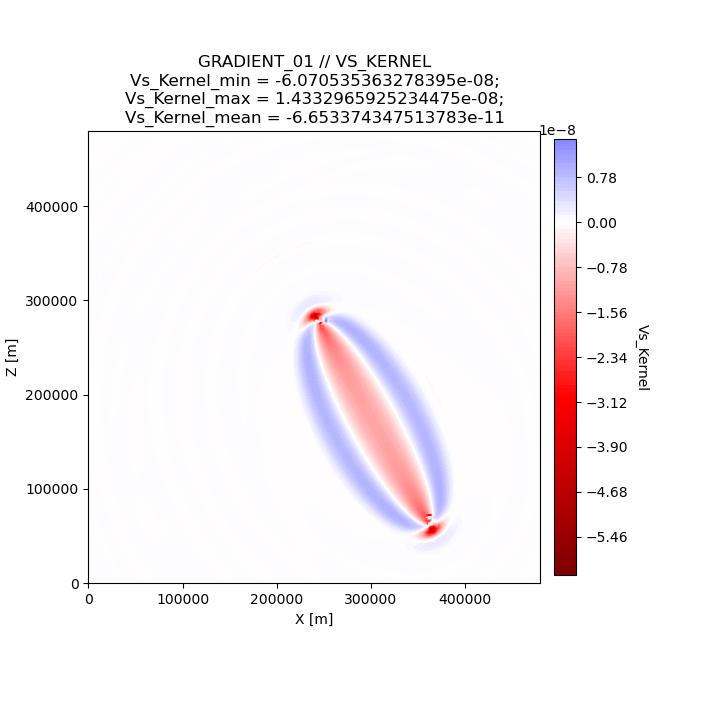

In [11]:
Image("g_01_vs.png")

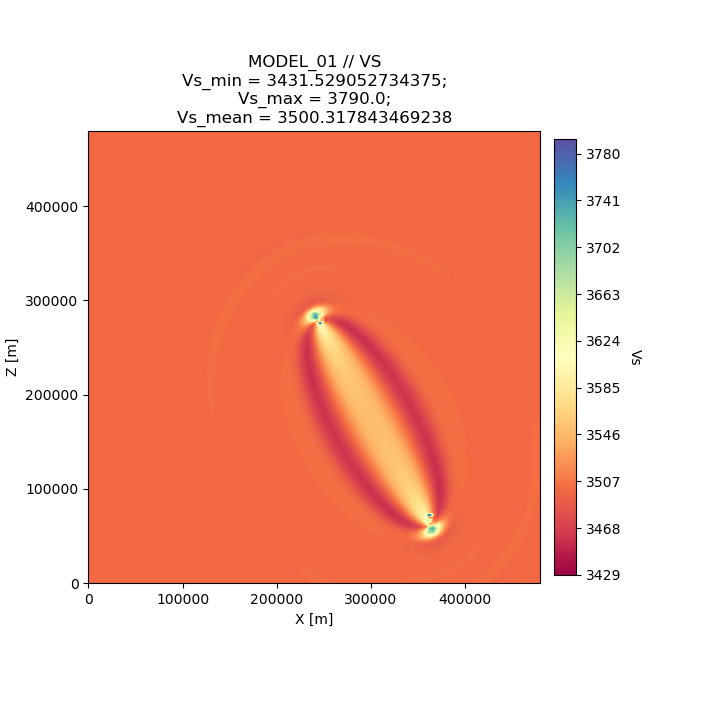

In [12]:
Image("m_01_vs.png")

## 4) Example 2a: Re-create a Kernel from Tape et al. 2007

- This Example runs Example 2, for 1 event and 32 stations, comparing a homogeneous halfspace model with a checkerboard model. It generate a gradient and updated model.  
- See [SeisFlows Example \#2a docs page](https://seisflows.readthedocs.io/en/devel/specfem2d_example.html#re-creating-kernels-from-tape-et-al-2007) for guidance on what is going on.  
- **NOTE**: You can choose which event ID you're running by changing the integer after `--event_id`. Tape et al. show results for Event IDs 1 through 7.
- **Benchmark time for cell: ~4m**

In [13]:
# Run Example 2 for only 1 iteration, and for a given event ID
%cd /home/scoped/work/example_2a
! seisflows examples run 2 -r /home/scoped/specfem2d --with_mpi --niter 1 --event_id 7  # <-- Choose your event by changing this value

/home/scoped/work/example_2a

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                                @@@@@@@@@@@@@

In [14]:
# Plots the target and final models, as well as the gradient 
! seisflows plot2d MODEL_TRUE vs --savefig m_true_vs.png
! seisflows plot2d MODEL_01 vs --savefig m_01_vs.png
! seisflows plot2d GRADIENT_01 vs_kernel --savefig g_01_vs.png

Figure(707.107x707.107)
Figure(707.107x707.107)
Figure(707.107x707.107)


Using the navigation menu on the left, navigate to:

`home -> work -> example_2a`

and **open** the .png file that was created. Make sure that the kernel looks like one of the panels provided in [Figure 9 of Tape et al.](https://seisflows.readthedocs.io/en/devel/specfem2d_example.html#re-creating-kernels-from-tape-et-al-2007)

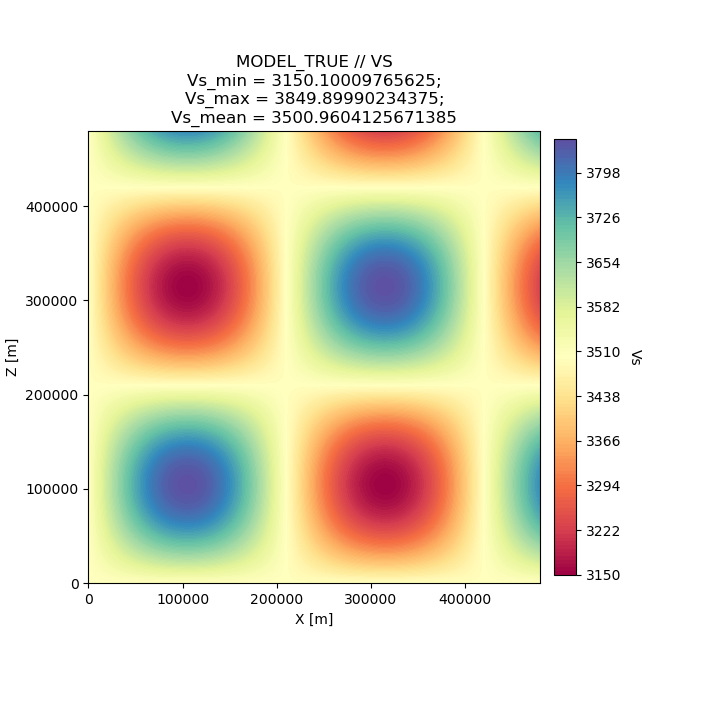

In [15]:
Image("m_true_vs.png")

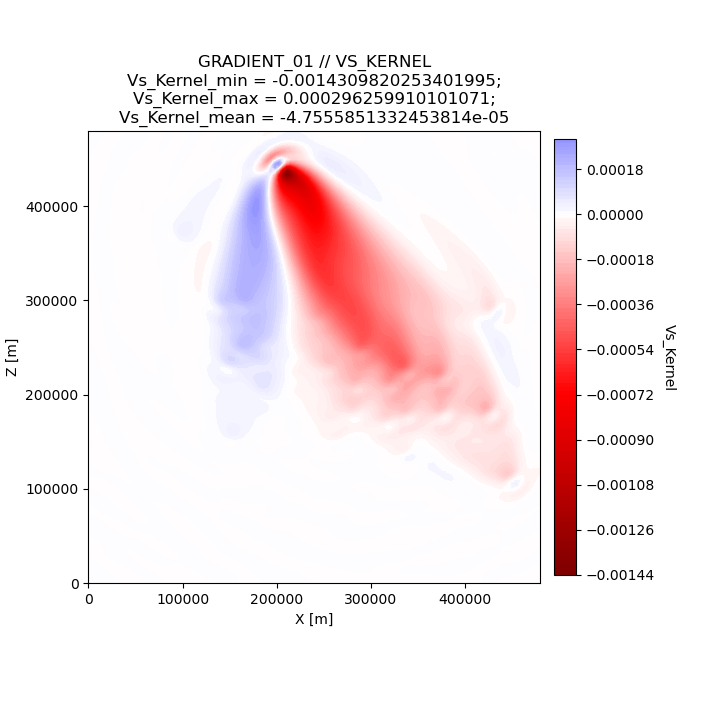

In [16]:
Image("g_01_vs.png")

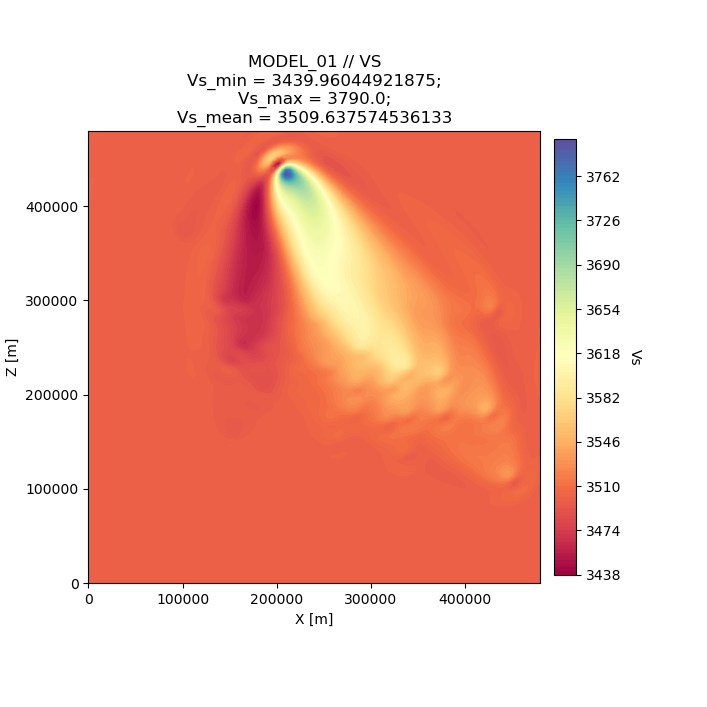

In [17]:
Image("m_01_vs.png")

### Waveform Figures

We can also look at waveform figures generated by `Pyatoa`, a misfit quantification package used by SeisFlows to determine data-synthetic misfit. These can be found be navigating to

`home -> work -> example_2 -> output -> pyaflowa -> figures`

There is one .pdf file in there, corresponding to waveforms generated during the first iteration (i01) and first step count (s01). If you open the PDF you'll see waveform comparison figures showing time shifts between data and synthetics.


### Re-running Examples

If you want to **re-run this example** to generate a new event kernel, you will have to remove the SeisFlows state file. 
This bypasses SeisFlows' checkpointing feature, which will not allow you to run another workflow within an existing workflow directory.

In [18]:
! rm /home/scoped/work/example_2a/sfstate.txt
! seisflows examples run 2 -r /home/scoped/specfem2d --with_mpi --niter 1 --event_id 5


                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                                @@@@@@@@@@@@@@@@@
                        

## 5) Example 3: En-masse Forward Simulations

- This Example runs forward simulations for 250 source-receiver pairs (10 events, 25 stations). 
- See [SeisFlows Example \#3 docs page](https://seisflows.readthedocs.io/en/devel/specfem2d_example.html#example-3-en-masse-forward-simulations) for guidance on what is going on. 
- **Benchmark time for cell: ~4m**

In [19]:
# Run Example 3
%cd /home/scoped/work/example_3
! seisflows examples run 3 -r /home/scoped/specfem2d --with_mpi --nproc 4

/home/scoped/work/example_3

                                    @@@@@@@@@@                        
                               .@@@@.    .%&(  %@.          
                            @@@@   @@@@   &@@@@@@ ,%@       
                         @@@@   @@@,  /@@              @    
                        @@@   @@@@   @@@              @     
                      @@@@   @@@@   @@@                @  @ 
                      @@@   @@@@   ,@@@                @ @  
                     @@@@   @@@@    @@@@              @@ @ @
                     @@@@   @@@@@    @@@@@          @@@ @@ @
                     @@@@    @@@@@     @@@@@@@@@@@@@@  @@  @
                      @@@@    @@@@@@        @@@&     @@@  @ 
                      @@@@@     @@@@@@@@         %@@@@#  @@ 
                        @@@@#      @@@@@@@@@@@@@@@@@   @@   
                         &@@@@@          @@@@(       @@&    
                            @@@@@@@             /@@@@       
                                @@@@@@@@@@@@@@

In [20]:
# Plots one synthetic waveform exported by the Solver
! seisflows plotst output/solver/001/syn/AA.S000000.BXY.semd --savefig AA.S000000.BXY.semd.png

# Plots multiple synthetic waveforms exported by the Solver
! seisflows plotst output/solver/001/syn/AA.S00000?.BXY.semd --savefig AA.S00000n.BXY.semd.png

Using the navigation menu on the left, navigate to:

`home -> work -> example_3`

and **open** the .png files that were created to look at the waveforms. The waveforms should be relatively simple since this is a homogeneous halfspace model.

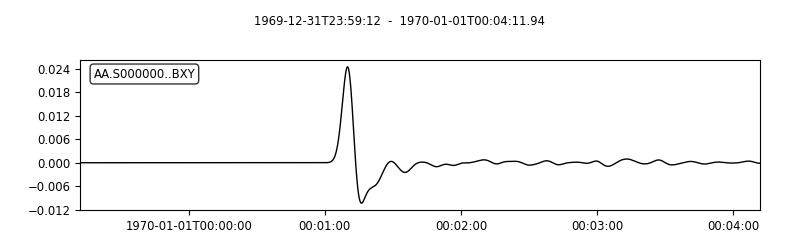

In [21]:
Image("AA.S000000.BXY.semd.png")

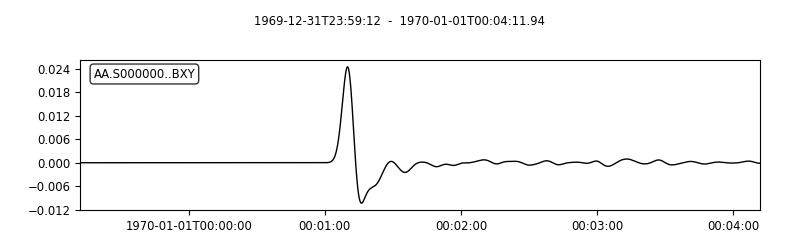

In [22]:
Image("AA.S000000.BXY.semd.png")

## 6) Testing SPECFEM3D

- We want to make sure we can run SPECFEM3D natively by running the homogeneous halfspace example problem using MPI.
- The cell first sets up the example directory, and then runs a 3D example problem with 4 processors.  
- We can not easily visualize SPECFEM3D results, so we plot synthetic waveforms as a check.
- **Benchmark time for cell: ~9m**

In [23]:
%cd /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace

# Setup example problem
! ln -s /home/scoped/specfem3d/bin .
! cp -r ./meshfem3D_files ./DATA/meshfem3D_files
! mkdir -p OUTPUT_FILES/DATABASES_MPI

# Run SPECFEM3D exectuables
! mpirun -n 4 bin/xmeshfem3D
! mpirun -n 4 bin/xgenerate_databases
! mpirun -n 4 bin/xspecfem3D

/home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace_HEX8_elastic_absorbing_Stacey_5sides


In [24]:
# Plots synthetic waveforms as a check
! seisflows plotst OUTPUT_FILES/*semd --savefig specfem3d_synthetics.png

Using the navigation menu on the left, navigate to:

`home -> specfem3d -> EXAMPLES -> homogeneous_halfspace`

and **open** the `specfem3d_synthetics.png` file to look at the waveforms. We can see the directivity of the moment tensor in the variation of amplitude of the given waveforms.

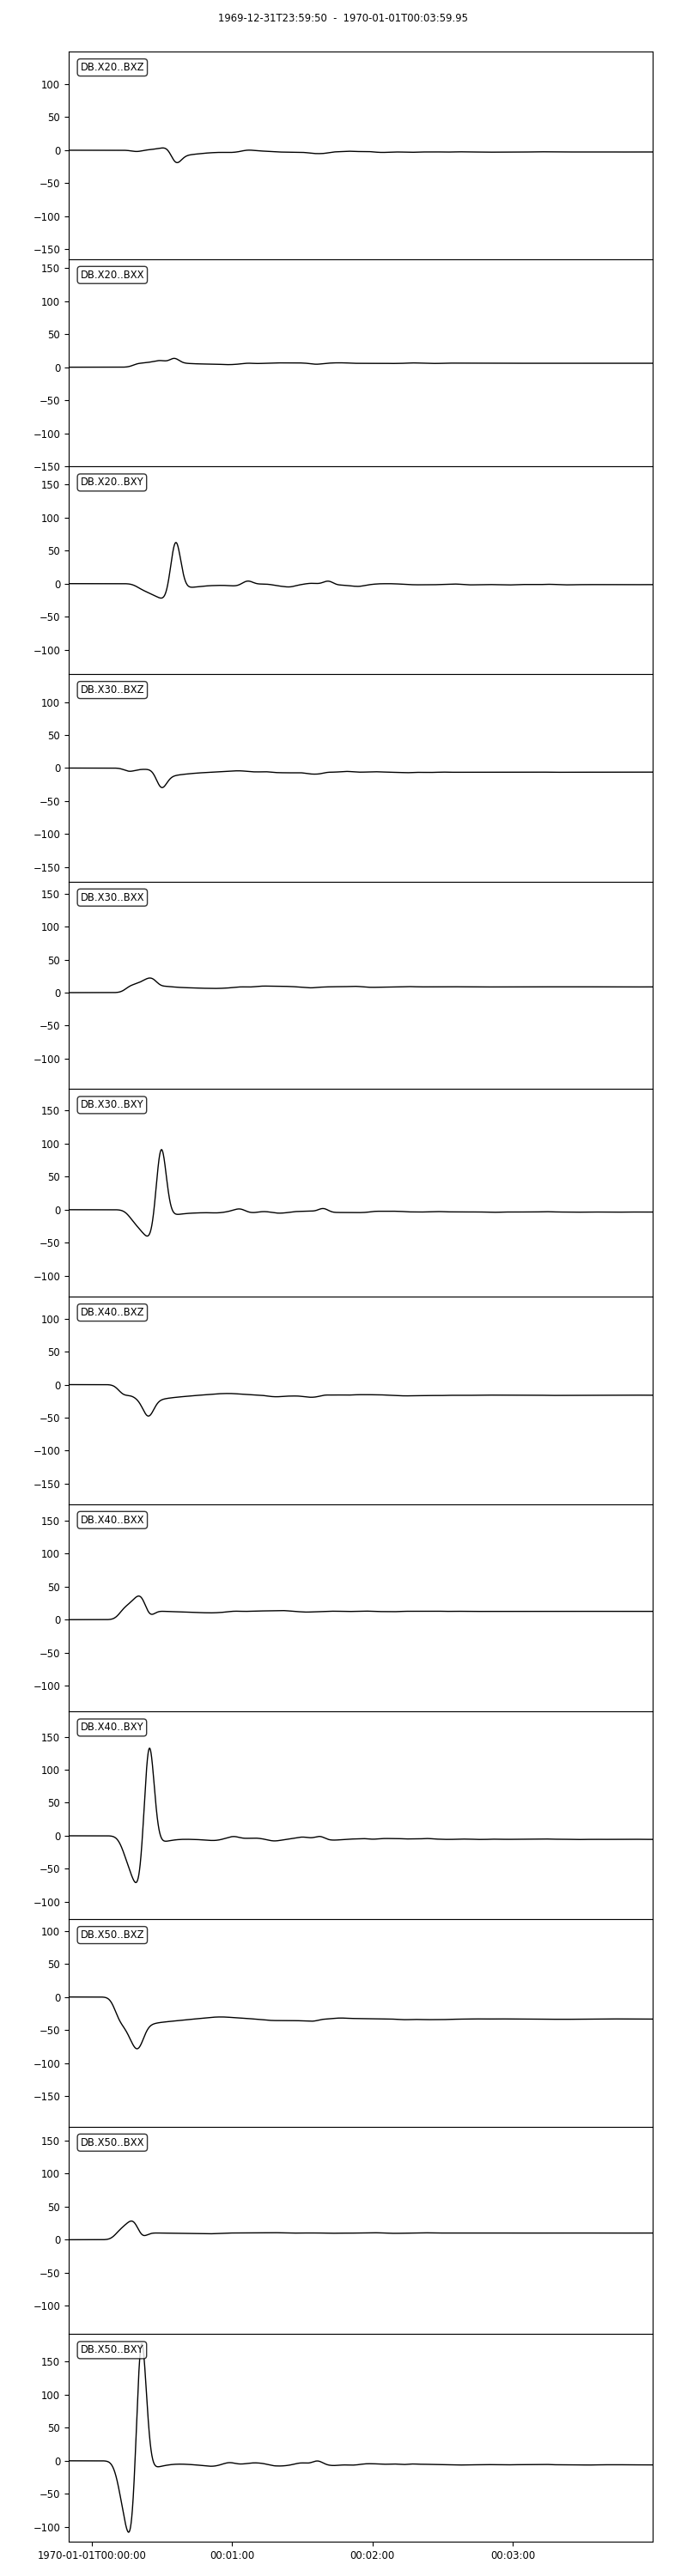

In [25]:
Image("specfem3d_synthetics.png")

```python
All done. Thanks :)
```